In [32]:
! python -m pip install tensorflow_hub first

You should consider upgrading via the 'C:\Users\nafissaad\AppData\Local\Programs\Python\Python37\python.exe -m pip install --upgrade pip' command.


In [33]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [88]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [89]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

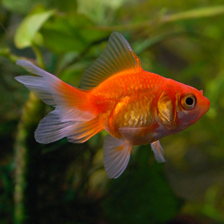

In [90]:
gold_fish = Image.open("goldfish.jpg").resize(IMAGE_SHAPE)
gold_fish

In [91]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [92]:
gold_fish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [93]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [94]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [95]:
predict_label_index = np.argmax(result)
predict_label_index

2

In [96]:
image_labels = []
with open ('ImageNetLabels.txt','r') as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [97]:
image_labels[predict_label_index]

'goldfish'

In [98]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [99]:
data_dir

'.\\datasets\\flower_photos'

In [100]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [101]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [102]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [103]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

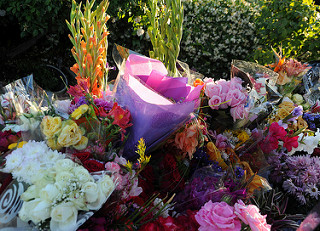

In [104]:
Image.open(str(roses[3]))

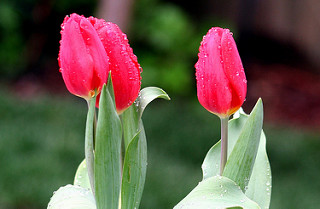

In [105]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[0]))

In [106]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [107]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [108]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [109]:
cv2.resize(img,IMAGE_SHAPE).shape

(224, 224, 3)

In [114]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [122]:
X=np.array(X)
y=np.array(y)

In [123]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=0)

In [124]:
x_train_scaled= X_train/255
x_test_scaled =X_test/255

In [125]:
X[0].shape

(224, 224, 3)

In [126]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

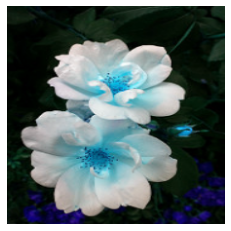

In [127]:
plt.axis('off')
plt.imshow(X[0])

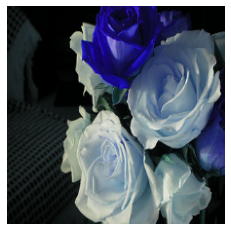

In [128]:
plt.axis('off')
plt.imshow(X[1])

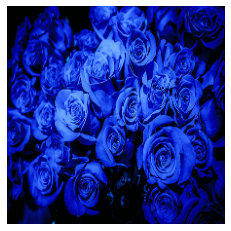

In [129]:
plt.axis('off')
plt.imshow(X[2])

In [130]:
predicted = classifier.predict(np.array([x[0],x[1],x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [131]:
image_labels[795]

'shower curtain'

In [132]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [134]:
num_of_flowers = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [136]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 153s 1s/step - loss: 0.8362 - acc: 0.6875
Epoch 2/5
86/86 [==============================] - 101s 1s/step - loss: 0.4155 - acc: 0.8565
Epoch 3/5
86/86 [==============================] - 101s 1s/step - loss: 0.3238 - acc: 0.8924
Epoch 4/5
86/86 [==============================] - 99s 1s/step - loss: 0.2692 - acc: 0.9186
Epoch 5/5
86/86 [==============================] - 99s 1s/step - loss: 0.2326 - acc: 0.9266


In [138]:
model.evaluate(x_test_scaled,y_test)

29/29 [==============================] - 34s 1s/step - loss: 0.3576 - acc: 0.8715


[0.3575877249240875, 0.8714597225189209]